In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('C:\\Users\\KUSHAGRA\\Downloads\\FRDATA_NOTCAT_ONEHOT_SCALED.csv')

In [2]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
fert = pd.read_csv('C:\\Users\\KUSHAGRA\\Downloads\\Fertilizer Name.csv')

In [4]:
fert.drop(columns=['Unnamed: 0'],inplace=True)
fert

,Fertilizer Name
0,Urea
1,DAP
2,14-35-14
3,28-28
4,Urea
...,...
94,28-28
95,10-26-26
96,Urea
97,DAP


In [5]:
data = pd.concat([data,fert],axis=1)


In [6]:
from sklearn.utils import resample
data_upsample = resample(data,replace=True,n_samples=1000,random_state=44)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data[data.columns[:-1]],data[data.columns[-1]],test_size=0.25,random_state=4)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.2,random_state=5)
xtrain, xtest, ytrain, ytest = train_test_split(data_upsample[data_upsample.columns[:-1]],data_upsample[data_upsample.columns[-1]],test_size=0.25,random_state=4)
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2,random_state=5)
print(Xtrain.shape)
print(Xtest.shape)
print(Xval.shape)
print(Ytrain.shape)
print(Ytest.shape)
print(Yval.shape)
print(xtrain.shape)
print(xtest.shape)
print(xval.shape)
print(ytrain.shape)
print(ytest.shape)
print(yval.shape)
np.unique(data['Fertilizer Name'])

(59, 11)
(25, 11)
(15, 11)
(59,)
(25,)
(15,)
(600, 11)
(250, 11)
(150, 11)
(600,)
(250,)
(150,)


array(['10-26-26', '14-35-14', '17-17-17', '20-20', '28-28', 'DAP',
       'Urea'], dtype=object)

C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0,

C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

Best Estimator: KNeighborsClassifier(n_neighbors=7)
Best Parameters: {'n_neighbors': 7}
Best Score0.6907070707070707


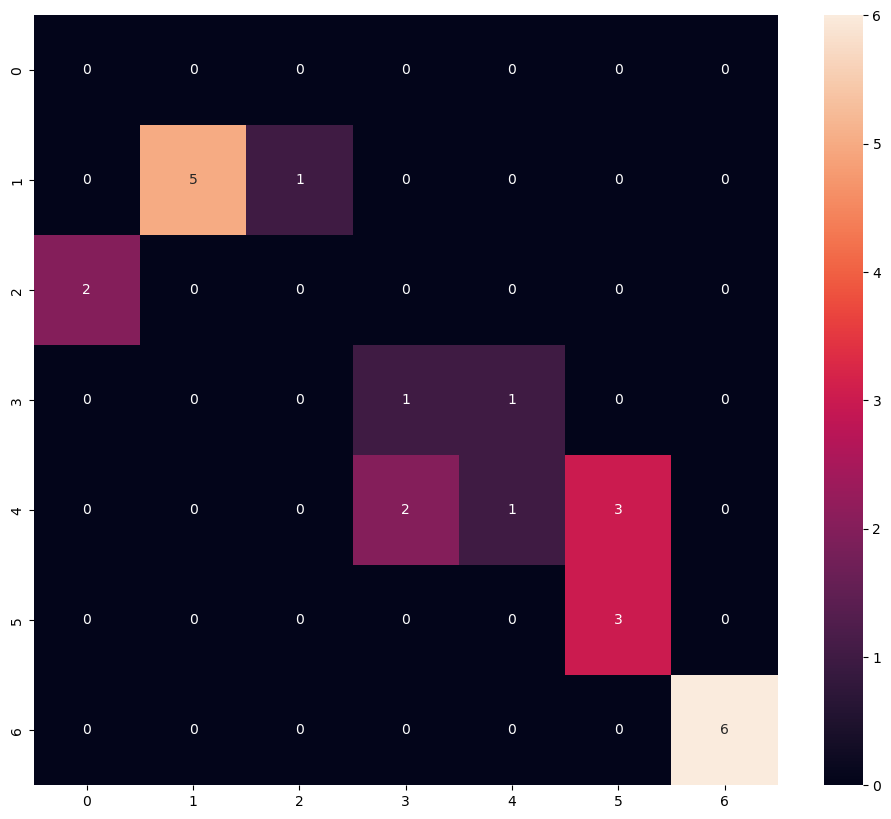

Test accuracy: 0.64
Test F1 score: 0.6301818181818182
Val accuracy: 0.7333333333333333
Val F1 score: 0.74


C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'n_neighbors':[5,6,7,8]}]
knn = KNeighborsClassifier()
gscv = GridSearchCV(knn,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(Xtrain,Ytrain)
Ypred = gscv.predict(Xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score"+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,Ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,Ytest)))
print('Test F1 score: '+str(f1_score(Ypred,Ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(Xval),Yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(Xval),Yval,average='weighted')))

C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Best Estimator: KNeighborsClassifier()
Best Parameters: {'n_neighbors': 5}
Best Score0.9932501732501733


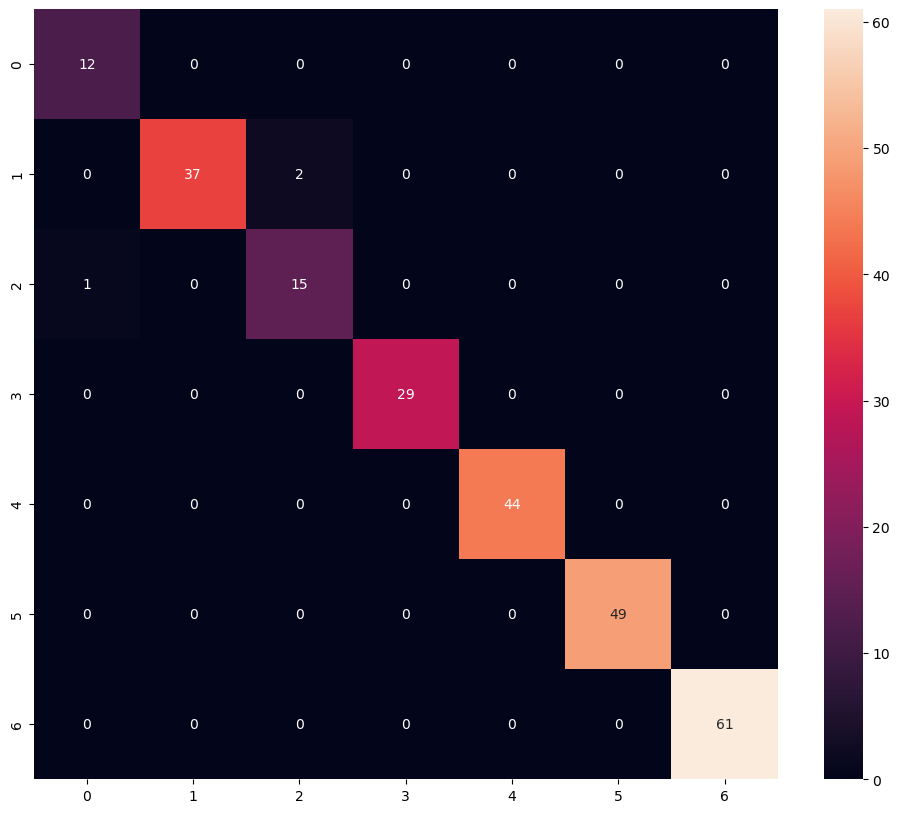

Test accuracy: 0.988
Test F1 score: 0.9881565550239234
Val accuracy: 0.9666666666666667
Val F1 score: 0.9681190994916484


C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'n_neighbors':[5,6,7,8]}]
knn = KNeighborsClassifier()
gscv = GridSearchCV(knn,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(xtrain,ytrain)
Ypred = gscv.predict(xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score"+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,ytest)))
print('Test F1 score: '+str(f1_score(Ypred,ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(xval),yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(xval),yval,average='weighted')))

C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Estimator: SVC(kernel='linear')
Best Parameters: {'C': 1.0, 'kernel': 'linear'}
Best Score0.9777777777777779


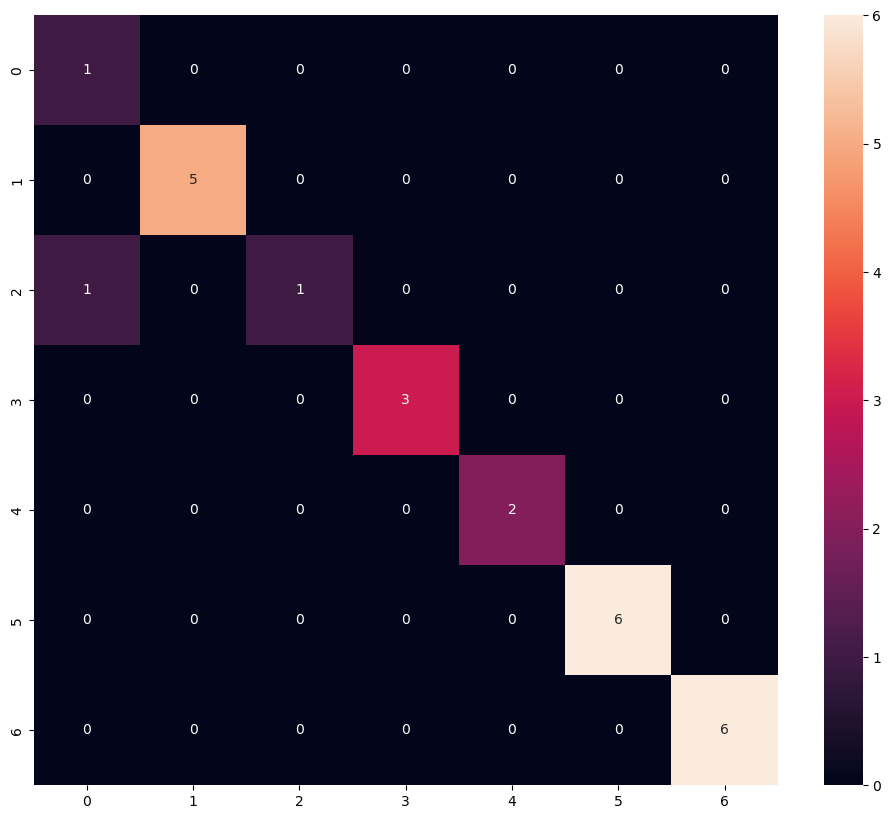

Test accuracy: 0.96
Test F1 score: 0.96
Val accuracy: 0.9333333333333333
Val F1 score: 0.9333333333333333


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'kernel':['linear','rbf','poly'],'C':[1.0,1.5,2.0]}]
svm = SVC()
gscv = GridSearchCV(svm,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(Xtrain,Ytrain)
Ypred = gscv.predict(Xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score"+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,Ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,Ytest)))
print('Test F1 score: '+str(f1_score(Ypred,Ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(Xval),Yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(Xval),Yval,average='weighted')))

Best Estimator: SVC(kernel='linear')
Best Parameters: {'C': 1.0, 'kernel': 'linear'}
Best Score: 1.0


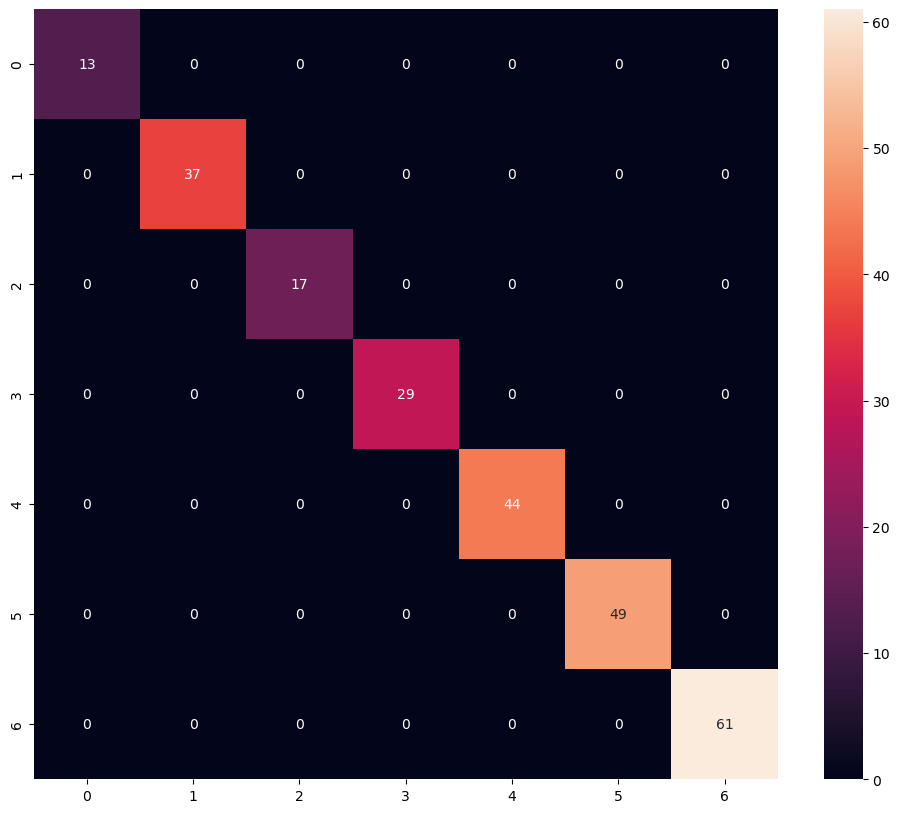

Test accuracy: 1.0
Test F1 score: 1.0
Val accuracy: 1.0
Val F1 score: 1.0


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'kernel':['linear','rbf','poly'],'C':[1.0,1.5,2.0]}]
svm = SVC()
gscv = GridSearchCV(svm,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(xtrain,ytrain)
Ypred = gscv.predict(xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score: "+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,ytest)))
print('Test F1 score: '+str(f1_score(Ypred,ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(xval),yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(xval),yval,average='weighted')))

C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Estimator: DecisionTreeClassifier(ccp_alpha=0, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features='auto')
Best Parameters: {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 4}
Best Score0.5627705627705628


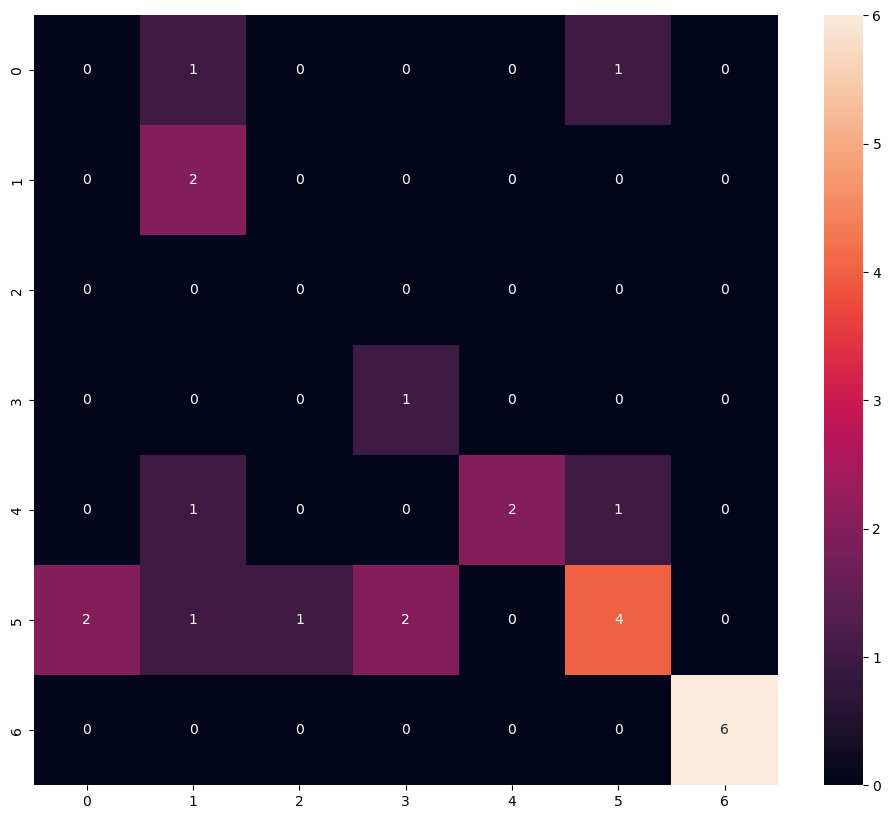

Test accuracy: 0.6
Test F1 score: 0.6123809523809524
Val accuracy: 0.6666666666666666
Val F1 score: 0.7355555555555554


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'criterion':['gini','entropy'],'max_depth':[2,3,4],'ccp_alpha':[0,0.1,0.25]}]
dt = DecisionTreeClassifier(max_features='auto',class_weight='balanced')
gscv = GridSearchCV(dt,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(Xtrain,Ytrain)
Ypred = gscv.predict(Xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score"+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,Ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,Ytest)))
print('Test F1 score: '+str(f1_score(Ypred,Ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(Xval),Yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(Xval),Yval,average='weighted')))

Best Estimator: DecisionTreeClassifier(ccp_alpha=0.1, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features='auto')
Best Parameters: {'ccp_alpha': 0.1, 'criterion': 'entropy', 'max_depth': 4}
Best Score0.6855355560959527


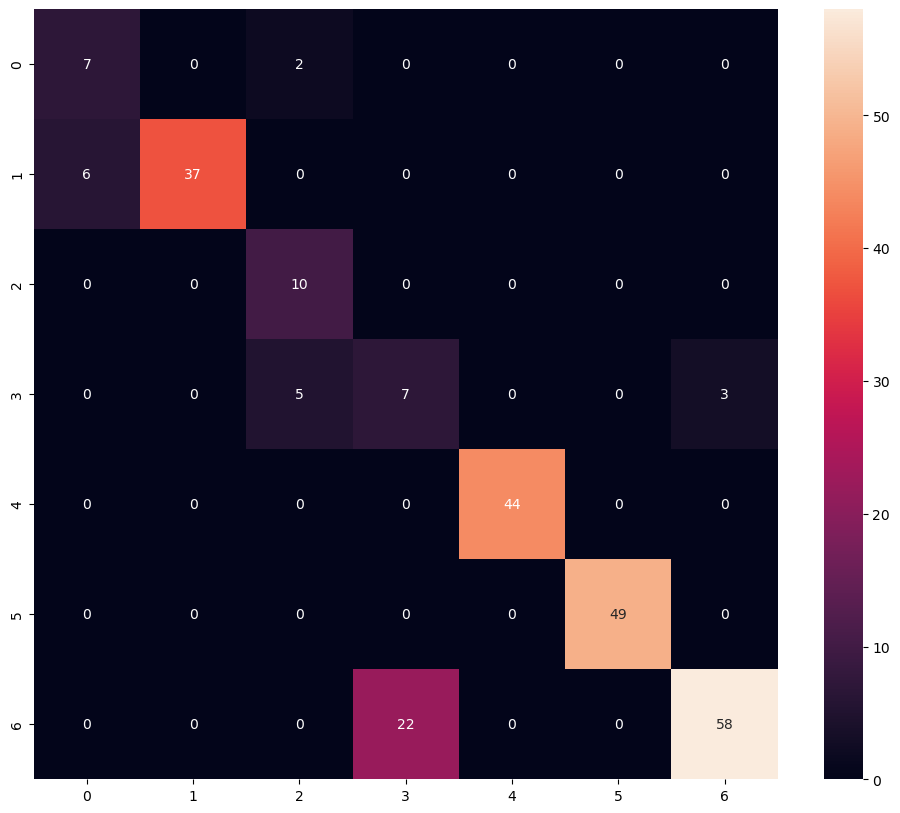

Test accuracy: 0.848
Test F1 score: 0.8659920409771473
Val accuracy: 0.84
Val F1 score: 0.8574146245961164


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'criterion':['gini','entropy'],'max_depth':[2,3,4],'ccp_alpha':[0.1]}]
dt = DecisionTreeClassifier(max_features='auto',class_weight='balanced')
gscv = GridSearchCV(dt,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(xtrain,ytrain)
Ypred = gscv.predict(xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score"+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,ytest)))
print('Test F1 score: '+str(f1_score(Ypred,ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(xval),yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(xval),yval,average='weighted')))

C:\Users\KUSHAGRA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Estimator: RandomForestClassifier(ccp_alpha=0.1, class_weight='balanced', max_depth=2,
                       max_features='sqrt')
Best Parameters: {'ccp_alpha': 0.1, 'class_weight': 'balanced', 'max_depth': 2, 'n_estimators': 100}
Best Score1.0


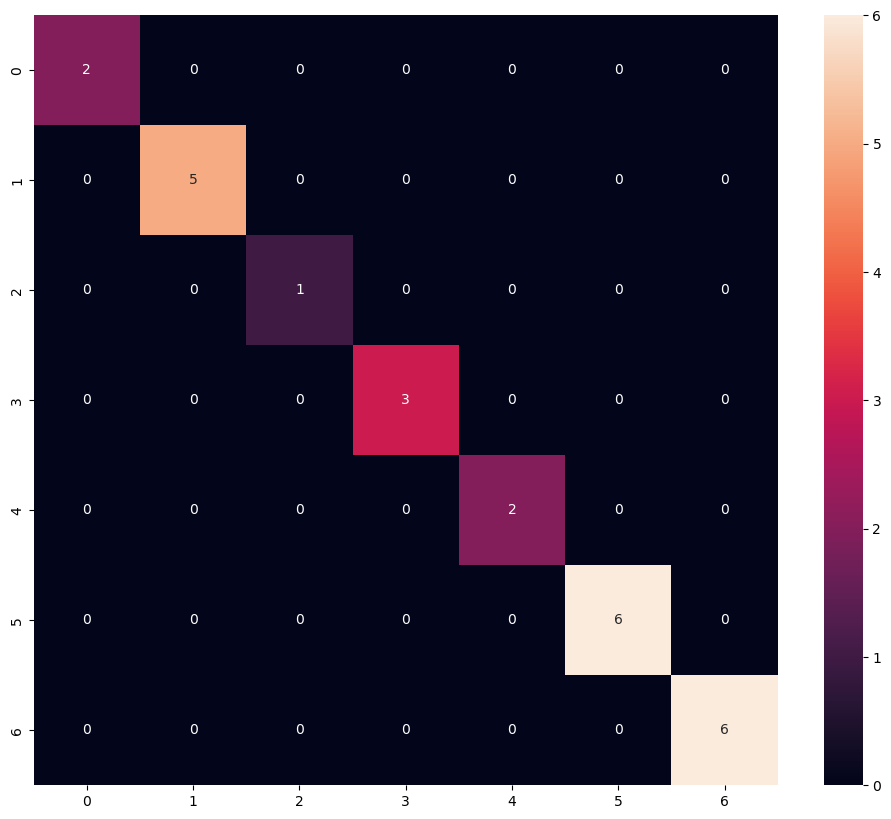

Test accuracy: 1.0
Test F1 score: 1.0
Val accuracy: 1.0
Val F1 score: 1.0


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'n_estimators':[100,150],'max_depth':[2,3,4],'ccp_alpha':[0,0.1,0.25],'class_weight':['balanced','balanced_subsample']}]
rfc = RandomForestClassifier(max_features='sqrt')
gscv = GridSearchCV(rfc,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(Xtrain,Ytrain)
Ypred = gscv.predict(Xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score"+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,Ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,Ytest)))
print('Test F1 score: '+str(f1_score(Ypred,Ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(Xval),Yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(Xval),Yval,average='weighted')))

Best Estimator: RandomForestClassifier(ccp_alpha=0, class_weight='balanced', max_depth=3,
                       max_features='sqrt')
Best Parameters: {'ccp_alpha': 0, 'class_weight': 'balanced', 'max_depth': 3, 'n_estimators': 100}
Best Score1.0


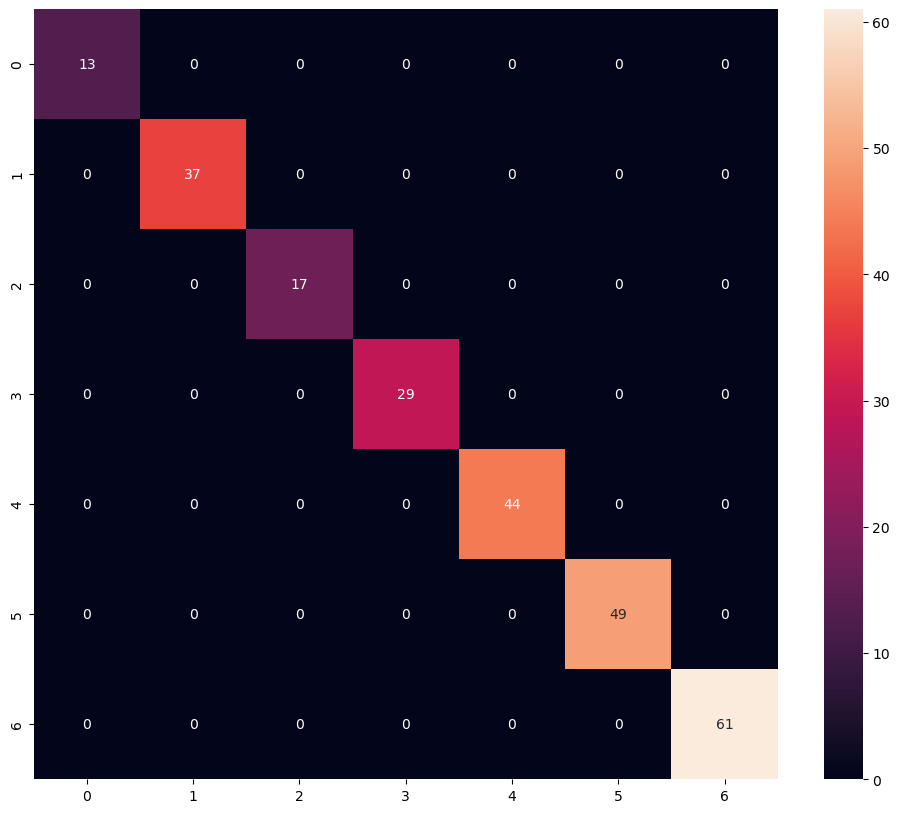

Test accuracy: 1.0
Test F1 score: 1.0
Val accuracy: 1.0
Val F1 score: 1.0


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
param_grid = [{'n_estimators':[100,150],'max_depth':[2,3,4],'ccp_alpha':[0,0.1,0.25],'class_weight':['balanced','balanced_subsample']}]
rfc = RandomForestClassifier(max_features='sqrt')
gscv = GridSearchCV(rfc,param_grid,cv=5,scoring='f1_weighted')
gscv = gscv.fit(xtrain,ytrain)
Ypred = gscv.predict(xtest)
print("Best Estimator: "+str(gscv.best_estimator_))
print("Best Parameters: "+str(gscv.best_params_))
print("Best Score"+str(gscv.best_score_))
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(Ypred,ytest),annot=True)
plt.show()
print('Test accuracy: '+str(accuracy_score(Ypred,ytest)))
print('Test F1 score: '+str(f1_score(Ypred,ytest,average='weighted')))
print('Val accuracy: '+str(accuracy_score(gscv.predict(xval),yval)))
print('Val F1 score: '+str(f1_score(gscv.predict(xval),yval,average='weighted')))